# **Phishing Website Detection using Machine Learning**

## **Overview**
This notebook demonstrates the implementation of machine learning techniques to detect phishing websites. Phishing websites are malicious sites designed to steal sensitive information such as usernames, passwords, and credit card details. By analyzing various features of URLs and website behavior, machine learning models can classify websites as legitimate or phishing.



---

## **Dataset**
The dataset used in this notebook contains labeled data with features extracted from URLs. Each row represents a website, and the features include:
- **Ranking**: Website ranking based on popularity.
- **Is IP**: Whether the URL contains an IP address.
- **Valid**: Validity of the URL.
- **Active Duration**: Duration for which the website has been active.
- **URL Length**: Length of the URL.
- **Contains '@'**: Whether the URL contains the '@' symbol.
- **Is Redirect**: Whether the URL redirects to another page.
- **Contains Dash**: Whether the URL contains a dash ('-').
- **Domain Length**: Length of the domain name.
- **Number of Subdomains**: Count of subdomains in the URL.

The target variable indicates whether the website is phishing (`1`) or legitimate (`0`).

---

## **Steps in the Notebook**

### **1. Objective**
- Extract and preprocess features from website URLs.
- Train and evaluate machine learning models for phishing website detection.
- Compare the performance of different models to identify the most effective approach.

### **2. Data Loading**
- Load the dataset into a Pandas DataFrame.
- Display the first few rows to understand the structure of the data.

### **3. Data Preprocessing**
- Handle missing values, if any.
- Normalize or scale numerical features to ensure uniformity.
- Encode categorical features, if applicable.

### **4. Visualizing the data**
- Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

### **5. Exploratory Data Analysis (EDA)**
- Visualize the distribution of features.
- Analyze correlations between features and the target variable.
- Identify any patterns or anomalies in the data.

### **6. Feature Selection**
- Select the most relevant features for training the models.
- Use techniques like correlation analysis or feature importance scores.

### **7. Model Training**
- Train multiple machine learning models, such as:
  - Logistic Regression
  - Decision Trees
  - Random Forest
  - Support Vector Machines (SVM)
  - Gradient Boosting (e.g., XGBoost, LightGBM)
  - Naive Bayes
  - Hybrid Models (LR-SVC, LR-DT, LR-SVC-DT, XGB-LR-SVC-DT)
- Split the data into training and testing sets to evaluate model performance.

- Evaluate models using metrics such as:
  - Accuracy
  - Precision
  - Recall
  - F1-Score
- Compare the performance of different models.

### **8. Comparision of Models**
- To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.
### **9. Final Model Selection**
- Select the best-performing model based on evaluation metrics.
- Save the trained model for deployment.
---

## **Dependencies**
The following Python libraries are used in this notebook:
- `pandas`: For data manipulation and analysis.
- `numpy`: For numerical computations.
- `matplotlib` and `seaborn`: For data visualization.
- `scikit-learn`: For machine learning model implementation and evaluation.

---


## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
data0 = pd.read_csv('combined_dataset.csv')
data0.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Checking the shape of the dataset
data0.shape

(95910, 12)

In [4]:
#Listing the features of the dataset
data0.columns

Index(['domain', 'ranking', 'isIp', 'valid', 'activeDuration', 'urlLen', 'is@',
       'isredirect', 'haveDash', 'domainLen', 'nosOfSubdomain', 'label'],
      dtype='object')

In [5]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 8.8+ MB


## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

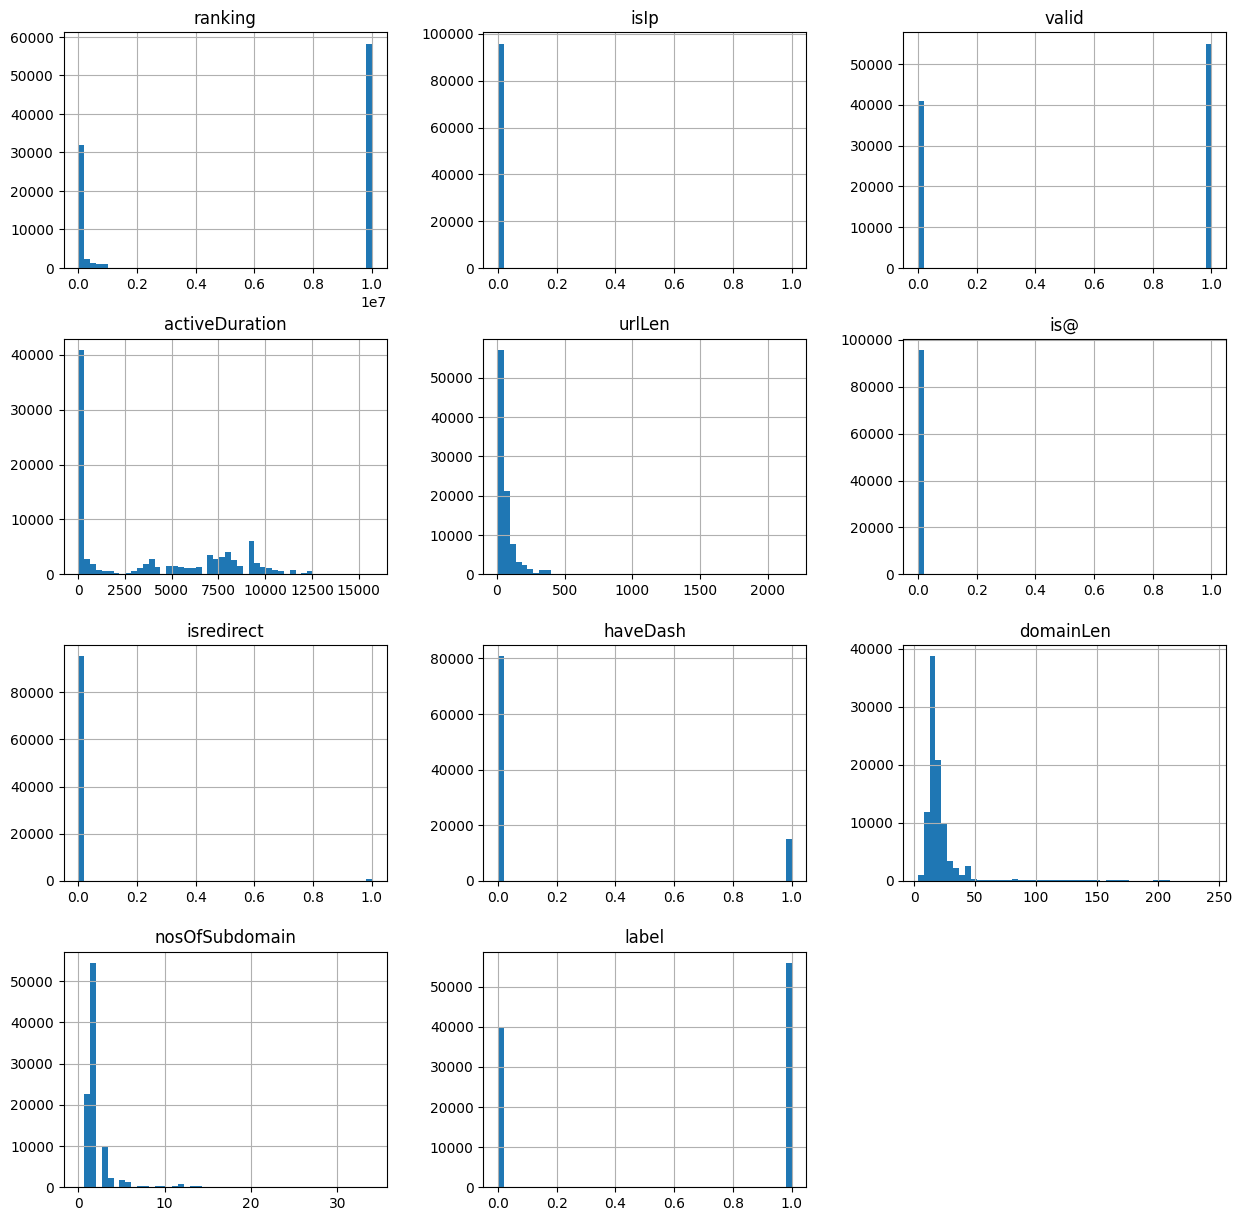

In [6]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [7]:
data0.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.327442,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740134,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [8]:
#Dropping the Domain column
data = data0.drop(['domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [9]:
#checking the data for null or missing values
data.isnull().sum()

ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

In [10]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,10000000,0,0,0,39,0,0,0,16,2,1
1,10000000,0,1,8036,33,0,0,0,17,2,1
2,10000000,0,1,7670,36,0,0,0,18,2,0
3,602,0,1,7305,30,0,0,0,29,2,1
4,2547,0,1,8035,36,0,0,0,17,2,0


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [11]:
# Sepratating & assigning features and target columns to X & y
y = data['label']
X = data.drop('label',axis=1)
X.shape, y.shape

((95910, 10), (95910,))

In [12]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
# X_train.shape, X_test.shape
print(X_test.iloc[1])

ranking           10000000
isIp                     0
valid                    0
activeDuration           0
urlLen                  29
is@                      0
isredirect               0
haveDash                 0
domainLen               20
nosOfSubdomain           2
Name: 26879, dtype: int64


## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines
* Multilayer Perceptrons
* Naive Bayes
* Hybrid Models (LR-SVC, LR-DT, LR-SVC-DT, XGB-LR-SVC-DT)

In [13]:
#importing packages
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [14]:
# Creating holders to store the model performance results
ML_Model = []
acc_test = []
f1_scores = []
recall_scores = []
precision_scores = []

#function to call for storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    acc_test.append(round(a, 3))
    precision_scores.append(round(b, 3))
    recall_scores.append(round(c, 3))
    f1_scores.append(round(d, 3))
    

### **7.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [15]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 10)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [16]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [17]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
f1Score = f1_score(y_test, y_test_tree)
recall = recall_score(y_test, y_test_tree)
precision = precision_score(y_test, y_test_tree)


print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.943
Decision Tree: Accuracy on test Data: 0.939


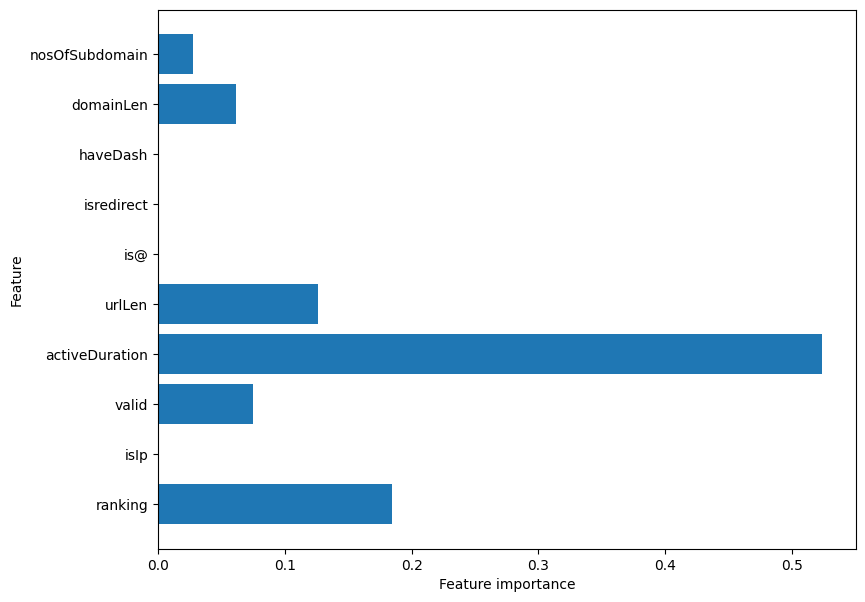

In [18]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [19]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_test_tree, precision, recall, f1Score)

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [20]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=10)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [21]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [22]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)
f1Score = f1_score(y_test, y_test_forest)
recall = recall_score(y_test, y_test_forest)
precision = precision_score(y_test, y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.943
Random forest: Accuracy on test Data: 0.941


**Storing the results:**

In [23]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_test_forest, precision, recall, f1Score)

### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [24]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [25]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [26]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)
f1Score = f1_score(y_test, y_test_mlp)
recall = recall_score(y_test, y_test_mlp)
precision = precision_score(y_test, y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.741
Multilayer Perceptrons: Accuracy on test Data: 0.742


**Storing the results:**

In [27]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_test_mlp, precision, recall, f1Score)

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [28]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=10)
#fit the model
xgb.fit(X_train, y_train)
import joblib
joblib.dump(xgb, 'model.joblib.dat') 

['model.joblib.dat']

In [29]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [30]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)
f1Score = f1_score(y_test, y_test_xgb)
recall = recall_score(y_test, y_test_xgb)
precision = precision_score(y_test, y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.971
XGBoost : Accuracy on test Data: 0.957


**Storing the results:**

In [31]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_test_xgb, precision, recall, f1Score)

**Performance Evaluation:**

### **7.6. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [32]:
#Support vector machine model
from sklearn.svm import LinearSVC

svm = LinearSVC(C=0.1, random_state=12, max_iter=10000, dual=False)
svm.fit(X_train, y_train)

LinearSVC(C=0.1, dual=False, max_iter=10000, random_state=12)

In [33]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [34]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)
f1Score = f1_score(y_test, y_test_svm)
recall = recall_score(y_test, y_test_svm)
precision = precision_score(y_test, y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.727
SVM : Accuracy on test Data: 0.723


**Storing the results:**

In [35]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_test_svm, precision, recall, f1Score)

### **7.7. Linear Regression**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [37]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [38]:
#predicting the target value from the model for the samples
y_test_linear = linear_model.predict(X_test)
y_train_linear = linear_model.predict(X_train)


In [39]:
y_test_linear_rounded = np.round(y_test_linear)
y_train_linear_rounded = np.round(y_train_linear)

#computing the accuracy of the model performance
acc_train_lr = accuracy_score(y_train, y_train_linear_rounded)
acc_test_lr = accuracy_score(y_test, y_test_linear_rounded)
f1Score = f1_score(y_test, y_test_linear_rounded, average="micro")
recall = recall_score(y_test, y_test_linear_rounded, average="micro")
precision = precision_score(y_test, y_test_linear_rounded, average="micro")

print("Linear Regression: Accuracy on training data (rounded): {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test data (rounded): {:.3f}".format(acc_test_lr))
storeResults('Linear Regression', acc_test_lr, precision, recall, f1Score)

Linear Regression: Accuracy on training data (rounded): 0.853
Linear Regression: Accuracy on test data (rounded): 0.854


### **7.7. Naive Bayes**

Naive Bayes is a simple, probabilistic classification algorithm based on Bayes' theorem, assuming features are independent of each other given the class variable, and is often used for tasks like text classification and spam filtering. 

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [41]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [42]:
#predicting the target value from the model for the samples
y_test_nb = naive_bayes.predict(X_test)
y_train_nb = naive_bayes.predict(X_train)

#computing the accuracy of the model performance
acc_train_nb = accuracy_score(y_train, y_train_nb)
acc_test_nb = accuracy_score(y_test, y_test_nb)
f1Score = f1_score(y_test, y_test_nb, average="micro")
recall = recall_score(y_test, y_test_nb, average="micro")
precision = precision_score(y_test, y_test_nb, average="micro")

print("Naive Bayes (Classification): Accuracy on training data: {:.3f}".format(acc_train_nb))
print("Naive Bayes (Classification): Accuracy on test data: {:.3f}".format(acc_test_nb))
storeResults('Naive Bayes', acc_test_nb, precision, recall, f1Score)

Naive Bayes (Classification): Accuracy on training data: 0.827
Naive Bayes (Classification): Accuracy on test data: 0.827


### **7.8. Gradient Boosting**

Gradient Boosting is a ensemble learning method used for classification and regression tasks. It is a boosting algorithm which combine multiple weak learner to create a strong predictive model. It works by sequentially training models where each new model tries to correct the errors made by its predecessor.

In gradient boosting each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration the algorithm computes the gradient of the loss function with respect to the predictions and then trains a new weak model to minimize this gradient. The predictions of the new model are then added to the ensemble and the process is repeated until a stopping criterion is met.

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [44]:
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [45]:
#predicting the target value from the model for the samples
y_test_gbm_class = gbm_classifier.predict(X_test)
y_train_gbm_class = gbm_classifier.predict(X_train)

In [46]:
#computing the accuracy of the model performance
accuracy_train_gbm_class = accuracy_score(y_train, y_train_gbm_class)
accuracy_test_gbm_class = accuracy_score(y_test, y_test_gbm_class)
f1Score = f1_score(y_test, y_test_gbm_class, average="micro")
recall = recall_score(y_test, y_test_gbm_class, average="micro")
precision = precision_score(y_test, y_test_gbm_class, average="micro")

print("GBM (Classification): Accuracy on training data: {:.3f}".format(accuracy_train_gbm_class))
print("GBM (Classification): Accuracy on test data: {:.3f}".format(accuracy_test_gbm_class))
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('GBM', accuracy_test_gbm_class, precision, recall, f1Score)

GBM (Classification): Accuracy on training data: 0.928
GBM (Classification): Accuracy on test data: 0.928


In [47]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [48]:
lr = LogisticRegression(random_state=42, max_iter=1000) 
svc = SVC(probability=True, random_state=42, max_iter=1000) 
dt = DecisionTreeClassifier(random_state=42)

### **7.9. Hybrid Model with Linear Regression, Support Vector Machine and Decision Tree**

- A hybrid model combines the strengths of multiple machine learning algorithms to improve prediction accuracy and robustness. This model integrates Logistic Regression (LR), Support Vector Classifier (SVC), and Decision Tree (DT) using a soft voting ensemble, which leverages the predicted probabilities of each algorithm for final predictions. Logistic Regression is effective for binary classification tasks, SVC handles both linear and non-linear classification problems, and Decision Tree captures non-linear relationships while providing interpretability. By combining these models, the hybrid approach achieves improved accuracy, robustness, and flexibility, making it particularly suitable for tasks like phishing website detection, where data may exhibit both linear and non-linear patterns.


In [49]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', lr), ('svc', svc), ('dt', dt)], voting='soft')
voting_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('svc',
                              SVC(max_iter=1000, probability=True,
                                  random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [50]:
#predicting the target value from the model for the samples
y_test_hybrid_class = voting_clf.predict(X_test)
y_train_hybrid_class = voting_clf.predict(X_train)

In [51]:
#computing the accuracy of the model performance
accuracy_train_hybrid_class = accuracy_score(y_train, y_train_hybrid_class)
accuracy_test_hybrid_class = accuracy_score(y_test, y_test_hybrid_class)
f1Score = f1_score(y_test, y_test_hybrid_class, average="micro")
recall = recall_score(y_test, y_test_hybrid_class, average="micro")
precision = precision_score(y_test, y_test_hybrid_class, average="micro")

print("Hybrid Model (Classification): Accuracy on training data: {:.3f}".format(accuracy_train_hybrid_class))
print("Hybrid Model (Classification): Accuracy on test data: {:.3f}".format(accuracy_test_hybrid_class))
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Hybrid Model', accuracy_test_hybrid_class, precision, recall, f1Score)

Hybrid Model (Classification): Accuracy on training data: 0.968
Hybrid Model (Classification): Accuracy on test data: 0.939


### **7.9. Hybrid Model with Linear Regression and Support Vector Machine**

- A hybrid model combines the strengths of multiple machine learning algorithms to improve prediction accuracy and robustness. This model integrates Logistic Regression (LR), Support Vector Classifier (SVC), and Decision Tree using a soft voting ensemble, which leverages the predicted probabilities of each algorithm for final predictions. Logistic Regression is effective for binary classification tasks, SVC handles both linear and non-linear classification problems. By combining these models, the hybrid approach achieves improved accuracy, robustness, and flexibility, making it particularly suitable for tasks like phishing website detection, where data may exhibit both linear and non-linear patterns.

In [52]:
lr = LogisticRegression(random_state=42, max_iter=1000) 
svc = SVC(probability=True, random_state=42, max_iter=1000) 

In [53]:
voting_clf = VotingClassifier(estimators=[('lr', lr), ('svc', svc)], voting='soft')
voting_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('svc',
                              SVC(max_iter=1000, probability=True,
                                  random_state=42))],
                 voting='soft')

In [54]:
#predicting the target value from the model for the samples
y_test_hybrid_class = voting_clf.predict(X_test)
y_train_hybrid_class = voting_clf.predict(X_train)

In [55]:
#computing the accuracy of the model performance
accuracy_train_hybrid_class = accuracy_score(y_train, y_train_hybrid_class)
accuracy_test_hybrid_class = accuracy_score(y_test, y_test_hybrid_class)
f1Score = f1_score(y_test, y_test_hybrid_class, average="micro")
recall = recall_score(y_test, y_test_hybrid_class, average="micro")
precision = precision_score(y_test, y_test_hybrid_class, average="micro")

print("Hybrid Model (Classification): Accuracy on training data: {:.3f}".format(accuracy_train_hybrid_class))
print("Hybrid Model (Classification): Accuracy on test data: {:.3f}".format(accuracy_test_hybrid_class))
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Hybrid Model LR - SVC', accuracy_test_hybrid_class, precision, recall, f1Score)

Hybrid Model (Classification): Accuracy on training data: 0.820
Hybrid Model (Classification): Accuracy on test data: 0.815


### **7.9. Hybrid Model with Support Vector Machine and Decision Tree**

- A hybrid model combines the strengths of multiple machine learning algorithms to improve prediction accuracy and robustness. This model integrates Support Vector Classifier (SVC), and Decision Tree using a soft voting ensemble, which leverages the predicted probabilities of each algorithm for final predictions. SVC handles both linear and non-linear classification problems. By combining these models, the hybrid approach achieves improved accuracy, robustness, and flexibility, making it particularly suitable for tasks like phishing website detection, where data may exhibit both linear and non-linear patterns.

In [56]:
svc = SVC(probability=True, random_state=42, max_iter=1000) 
dt = DecisionTreeClassifier(random_state=42)

In [57]:
voting_clf = VotingClassifier(estimators=[('svc', svc), ('dt', dt)], voting='soft')
voting_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier(estimators=[('svc',
                              SVC(max_iter=1000, probability=True,
                                  random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [58]:
#predicting the target value from the model for the samples
y_test_hybrid_class = voting_clf.predict(X_test)
y_train_hybrid_class = voting_clf.predict(X_train)

In [59]:
#computing the accuracy of the model performance
accuracy_train_hybrid_class = accuracy_score(y_train, y_train_hybrid_class)
accuracy_test_hybrid_class = accuracy_score(y_test, y_test_hybrid_class)
f1Score = f1_score(y_test, y_test_hybrid_class, average="micro")
recall = recall_score(y_test, y_test_hybrid_class, average="micro")
precision = precision_score(y_test, y_test_hybrid_class, average="micro")

print("Hybrid Model (Classification): Accuracy on training data: {:.3f}".format(accuracy_train_hybrid_class))
print("Hybrid Model (Classification): Accuracy on test data: {:.3f}".format(accuracy_test_hybrid_class))
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Hybrid Model SVC - DT', accuracy_test_hybrid_class, precision, recall, f1Score)

Hybrid Model (Classification): Accuracy on training data: 0.982
Hybrid Model (Classification): Accuracy on test data: 0.948


### **7.9. Hybrid Model with Linear Regression and Decision Tree**

- A hybrid model combines the strengths of multiple machine learning algorithms to improve prediction accuracy and robustness. This model integrates Logistic Regression (LR) and Decision Tree (DT) using a soft voting ensemble, which leverages the predicted probabilities of each algorithm for final predictions. Logistic Regression is effective for binary classification and Decision Tree captures non-linear relationships while providing interpretability. By combining these models, the hybrid approach achieves improved accuracy, robustness, and flexibility, making it particularly suitable for tasks like phishing website detection, where data may exhibit both linear and non-linear patterns.

In [60]:
lr = LogisticRegression(random_state=42, max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)

In [61]:
voting_clf = VotingClassifier(estimators=[('lr', lr), ('dt', dt)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [62]:
#predicting the target value from the model for the samples
y_test_hybrid_class = voting_clf.predict(X_test)
y_train_hybrid_class = voting_clf.predict(X_train)

In [63]:
#computing the accuracy of the model performance
accuracy_train_hybrid_class = accuracy_score(y_train, y_train_hybrid_class)
accuracy_test_hybrid_class = accuracy_score(y_test, y_test_hybrid_class)
f1Score = f1_score(y_test, y_test_hybrid_class, average="micro")
recall = recall_score(y_test, y_test_hybrid_class, average="micro")
precision = precision_score(y_test, y_test_hybrid_class, average="micro")


print("Hybrid Model (Classification): Accuracy on training data: {:.3f}".format(accuracy_train_hybrid_class))
print("Hybrid Model (Classification): Accuracy on test data: {:.3f}".format(accuracy_test_hybrid_class))
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Hybrid Model LR - DT', accuracy_test_hybrid_class, precision, recall, f1Score)

Hybrid Model (Classification): Accuracy on training data: 0.980
Hybrid Model (Classification): Accuracy on test data: 0.949


### **7.9. Hybrid Model with XGBoost and Decision Tree**

- A hybrid model combines the strengths of multiple machine learning algorithms to improve prediction accuracy and robustness. This model integrates XGBoost and Decision Tree (DT) using a soft voting ensemble, which leverages the predicted probabilities of each algorithm for final predictions. XGBoost is effective for binary classification and Decision Tree captures non-linear relationships while providing interpretability. By combining these models, the hybrid approach achieves improved accuracy, robustness, and flexibility, making it particularly suitable for tasks like phishing website detection, where data may exhibit both linear and non-linear patterns.

In [64]:
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
dt = DecisionTreeClassifier(random_state=42)

In [65]:
voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('dt', dt)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.4, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [66]:
#predicting the target value from the model for the samples
y_test_hybrid_class = voting_clf.predict(X_test)
y_train_hybrid_class = voting_clf.predict(X_train)

In [67]:
#computing the accuracy of the model performance
accuracy_train_hybrid_class = accuracy_score(y_train, y_train_hybrid_class)
accuracy_test_hybrid_class = accuracy_score(y_test, y_test_hybrid_class)
f1Score = f1_score(y_test, y_test_hybrid_class, average="micro")
recall = recall_score(y_test, y_test_hybrid_class, average="micro")
precision = precision_score(y_test, y_test_hybrid_class, average="micro")

print("Hybrid Model (Classification): Accuracy on training data: {:.3f}".format(accuracy_train_hybrid_class))
print("Hybrid Model (Classification): Accuracy on test data: {:.3f}".format(accuracy_test_hybrid_class))
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Hybrid Model XGB - DT', accuracy_test_hybrid_class, precision, recall, f1Score)


Hybrid Model (Classification): Accuracy on training data: 0.982
Hybrid Model (Classification): Accuracy on test data: 0.952


### **7.9. Hybrid Model with XGBoost, Linear Regression, Support Vector Machine and Decision Tree**

- A hybrid model combines the strengths of multiple machine learning algorithms to improve prediction accuracy and robustness. This model integrates XGBoost(XGB), Logistic Regression (LR) and Decision Tree (DT) using a soft voting ensemble, which leverages the predicted probabilities of each algorithm for final predictions. Logistic Regression is effective for binary classification and Decision Tree captures non-linear relationships while providing interpretability. By combining these models, the hybrid approach achieves improved accuracy, robustness, and flexibility, making it particularly suitable for tasks like phishing website detection, where data may exhibit both linear and non-linear patterns.

In [68]:
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
lr = LogisticRegression(random_state=42, max_iter=1000) 
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(probability=True, random_state=42, max_iter=1000) 

In [69]:
voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('dt', dt), ('lr', lr), ('svc', svc)], voting='soft')
voting_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('svc',
                              SVC(max_iter=1000, probability=True,
                                  random_state=42))],
                 voting='soft')

In [70]:
#predicting the target value from the model for the samples
y_test_hybrid_class = voting_clf.predict(X_test)
y_train_hybrid_class = voting_clf.predict(X_train)

In [71]:
#computing the accuracy of the model performance
accuracy_train_hybrid_class = accuracy_score(y_train, y_train_hybrid_class)
accuracy_test_hybrid_class = accuracy_score(y_test, y_test_hybrid_class)
f1Score = f1_score(y_test, y_test_hybrid_class, average="micro")
recall = recall_score(y_test, y_test_hybrid_class, average="micro")
precision = precision_score(y_test, y_test_hybrid_class, average="micro")

print("Hybrid Model (Classification): Accuracy on training data: {:.3f}".format(accuracy_train_hybrid_class))
print("Hybrid Model (Classification): Accuracy on test data: {:.3f}".format(accuracy_test_hybrid_class))
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Hybrid Model XGB - LR - DT - SVC', accuracy_test_hybrid_class, precision, recall, f1Score)


Hybrid Model (Classification): Accuracy on training data: 0.975
Hybrid Model (Classification): Accuracy on test data: 0.953


## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [72]:
#creating dataframe
acc_test = [acc * 100 for acc in acc_test]
precision_scores = [acc * 100 for acc in precision_scores]
recall_scores = [acc * 100 for acc in recall_scores]
f1_scores = [acc * 100 for acc in f1_scores]
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Test Accuracy': acc_test,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Scores': f1_scores
    })
results

,ML Model,Test Accuracy,Precision,Recall,F1 Scores
0,Decision Tree,93.9,94.9,94.6,94.7
1,Random Forest,94.1,94.0,96.0,95.0
2,Multilayer Perceptrons,74.2,69.8,97.8,81.5
3,XGBoost,95.7,95.8,96.8,96.3
4,SVM,72.3,72.1,85.2,78.1
5,Linear Regression,85.4,85.4,85.4,85.4
6,Naive Bayes,82.7,82.7,82.7,82.7
7,GBM,92.8,92.8,92.8,92.8
8,Hybrid Model,93.9,93.9,93.9,93.9
9,Hybrid Model LR - SVC,81.5,81.5,81.5,81.5


In [73]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Precision', 'Recall', 'F1 Scores'], ascending=False)

,ML Model,Test Accuracy,Precision,Recall,F1 Scores
3,XGBoost,95.7,95.8,96.8,96.3
13,Hybrid Model XGB - LR - DT - SVC,95.3,95.3,95.3,95.3
12,Hybrid Model XGB - DT,95.2,95.2,95.2,95.2
11,Hybrid Model LR - DT,94.9,94.9,94.9,94.9
10,Hybrid Model SVC - DT,94.8,94.8,94.8,94.8
1,Random Forest,94.1,94.0,96.0,95.0
0,Decision Tree,93.9,94.9,94.6,94.7
8,Hybrid Model,93.9,93.9,93.9,93.9
7,GBM,92.8,92.8,92.8,92.8
5,Linear Regression,85.4,85.4,85.4,85.4


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [74]:
import joblib
joblib.dump(xgb, 'model.joblib.dat')

['model.joblib.dat']